

##            🐼 The killer Panda's Capstone Project 🐼


#  💸💲Budget/Gross/Profit 💸💲

The first dataset we work was the from `tn.movie_budgets.csv`, let's import all the libraries we will need

In [19]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
from scipy import stats

tn_budgets = pd.read_csv('data/tn.movie_budgets.csv', index_col=0)

#We can make a checkout of the dataset, know their columns and kind of values
#Also is useful if we check the information of our dataset
#If think you may need see this information, plese uncomment the code below

#tn_budgets.info()
#tn_budgets.head(10)

We can see we do not have missing values, all the type of data is object and we have four columns.
As you can see, `production_budget`, `domestic_gross`, `worldwide_gross` are columns for money so we need them in type int, let's make a cleaning delenting the `$ and ,`

In [2]:
'''
We made this funtion to clear all the columns just calling it, in order to reuse it 
we also set as argument a list call columns, if we had another data ser we couls call
the funtion and specify the columns we want to transform
'''
def cleaning(columns):
    for x in columns:
        # This part clean the symbols $ and , by replacing them with "nothing"
        tn_budgets[x]=tn_budgets[x].apply(lambda x: x.replace(",","").replace("$",""))
        # ecause of the type of this rows and columns and in order we 
        # want to make some calculation it is needed to transform them to numeric
        tn_budgets[x]=pd.to_numeric(tn_budgets[x])

#The columns we want to clean are save them in a list
columns =  ['production_budget', 'domestic_gross','worldwide_gross']

#Call the funtion, and now all the columns are in good formart! :D
cleaning(columns)

#Now we want to add a column call "earnings"
tn_budgets["earnings"]=tn_budgets["worldwide_gross"]-tn_budgets["production_budget"]

#As well as a column called "Profit"
tn_budgets["Profit"]=(tn_budgets["earnings"]/tn_budgets["worldwide_gross"])*100


### Ploting with seaborn

We have the new columns and the cleaning have been applied to all the data, but for a preview we only want to see the top ten movie sorted with more earnings

#### Earning

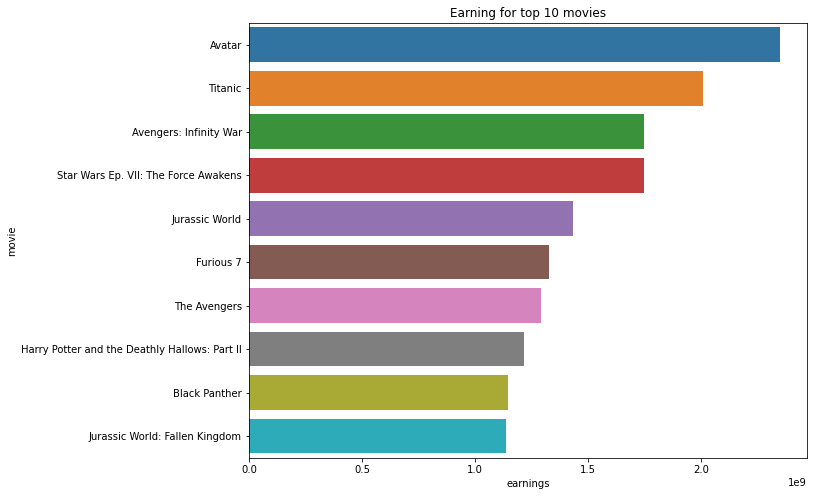

In [3]:
# Making a copy with the first 10 movies, you can use more than only 10 elemnts :D
tp1=tn_budgets.sort_values(by="earnings", ascending=False).head(10).copy()

#Making a new dataframe with only the required columns
topten1 = tp1.loc[:,["movie", "earnings"]]

fig= plt.subplots(figsize=(10, 8))

##We decide to use seaborn and the bar kind
seaborn.barplot(x ="earnings", y ="movie", data = topten1)
plt.title("Earning for top 10 movies")
plt.show()

#### Profit

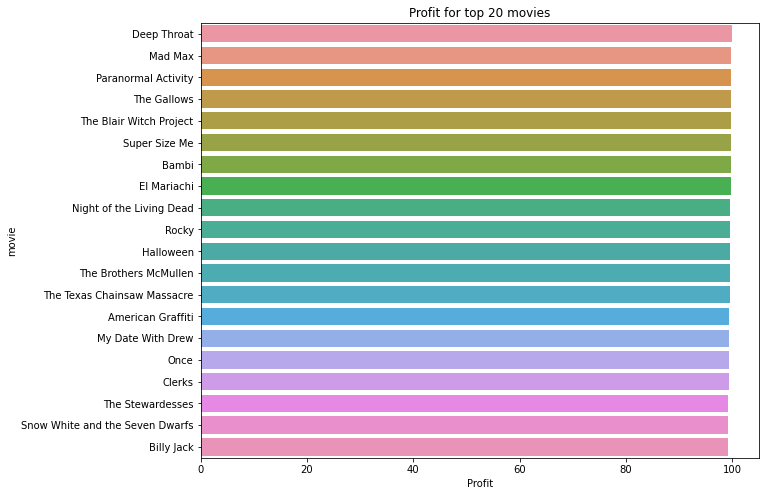

In [4]:
#We also want to see how it sees ploting the profit vs the movie
tptw=tn_budgets.sort_values(by="Profit", ascending=False).head(20).copy()

#Repeat the process for new columns
toptw = tptw.loc[:,["movie", "Profit"]]


fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(x ="Profit", y ="movie", data = toptw)
plt.title("Profit for top 20 movies")
plt.show()

#### Earning and budget

Exploring other options for the plotting. The movie's name are large, let's try to use an ID, crating a list with the IDs.

* How to use the method stack and how it works for seaborn by <a href="https://stackoverflow.com/users/1494637/stefan">Stefan</a> 
on <a href="https://stackoverflow.com/questions/37174715/using-seaborn-barplot-to-plot-wide-form-dataframes">Stack**overflow**</a>


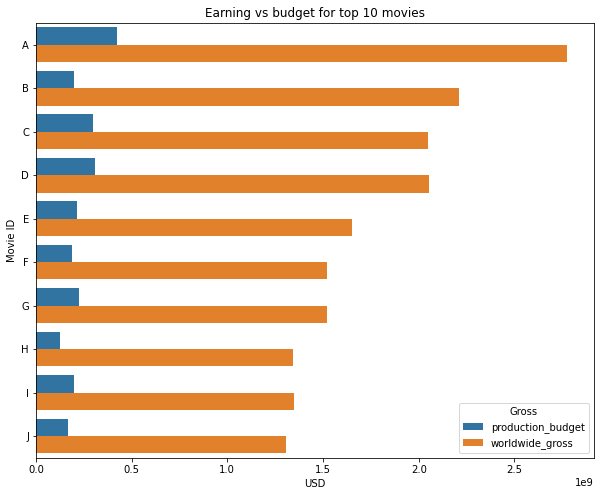

In [5]:
MovieID = ["A","B","C","D","E","F","G","H","I","J"]
tp2 = tp1

#adding the IDs to the dataframe
tp2["Movie ID"]= MovieID
topten2 = tp2.loc[:,["Movie ID","production_budget", "worldwide_gross"]]

#For this plot we want to plot two values for each movie, so in order to do that we need the "hue" expression
#In this expression the two values join 

#First let's set the ID columns as the index
topten2 = topten2.set_index("Movie ID")

#In order to use "hue" we need to chage the structure of the datafram with .stack()
stopten = topten2.stack().reset_index()

#Settin the columns to the new structured dataframe
stopten.columns = ['Movie ID', 'Gross', 'USD']

fig= plt.subplots(figsize=(10, 8))
seaborn.barplot(y ="Movie ID", x="USD", hue="Gross", data = stopten)
plt.title("Earning vs budget for top 10 movies")
plt.show()

#### Genres of the movies

For the plot above we have the graph but we do not know what is A or B, etc, let's make a new DataFarame which include the name of the movie as well as the director and their categorie, this information was gathered from the `im.db`

In [6]:
# DataFrame to explain what is A, B, C etc
#First a list with the genres and then the list for directors
genres_tp=["Action, Adventure, Sci-fi, Fantasy", 
           "Drama",  "Action, Sci-fi",
           "Action, Sci-fi-, Adventure, Fantasy", 
           "Action, Sci-fi-, Thriller, Adventure",
           "Action, Adventure", 
           "Action, Fantasy, Adventure, Sci-fi", 
           "Adventure, Fantasy, Mystery, Drama",
           "Action, Fantasy, Adventure, Sci-fi", 
           "Action, Adventure, Sci-Fi"]

director_tp=["James Cameron", "James Cameron", 
             "Anthony Russo, Joe Russo", 
             "J.J. Abrams", "Colin Trevorrow",
             "James Wan", "Joss Whedon", "David Yates", 
             "Ryan Coogler", "J.A. Bayona"]

#Gather the movie's name list from the previos Df
title = list(tp2["movie"])

#Creating the new Df using .zip()
ID_df=pd.DataFrame(zip(MovieID,title,genres_tp, director_tp), 
                   columns = ["MovieID", "Title", "Genre", "Director"])
ID_df.set_index("MovieID")

,Title,Genre,Director
MovieID,,,
A,Avatar,"Action, Adventure, Sci-fi, Fantasy",James Cameron
B,Titanic,Drama,James Cameron
C,Avengers: Infinity War,"Action, Sci-fi","Anthony Russo, Joe Russo"
D,Star Wars Ep. VII: The Force Awakens,"Action, Sci-fi-, Adventure, Fantasy",J.J. Abrams
E,Jurassic World,"Action, Sci-fi-, Thriller, Adventure",Colin Trevorrow
F,Furious 7,"Action, Adventure",James Wan
G,The Avengers,"Action, Fantasy, Adventure, Sci-fi",Joss Whedon
H,Harry Potter and the Deathly Hallows: Part II,"Adventure, Fantasy, Mystery, Drama",David Yates
I,Black Panther,"Action, Fantasy, Adventure, Sci-fi",Ryan Coogler


Now a new table for only the MovieID and the Genre

In [7]:
AB_df=pd.DataFrame(zip(MovieID,genres_tp), columns = ["MovieID", "Genre"])
AB_df.set_index("MovieID")

,Genre
MovieID,
A,"Action, Adventure, Sci-fi, Fantasy"
B,Drama
C,"Action, Sci-fi"
D,"Action, Sci-fi-, Adventure, Fantasy"
E,"Action, Sci-fi-, Thriller, Adventure"
F,"Action, Adventure"
G,"Action, Fantasy, Adventure, Sci-fi"
H,"Adventure, Fantasy, Mystery, Drama"
I,"Action, Fantasy, Adventure, Sci-fi"


### Plotting whit matplotlib

We also want to see how it sees the plot in matplotlib

Text(0.5, 1.0, 'Budget for each movie')

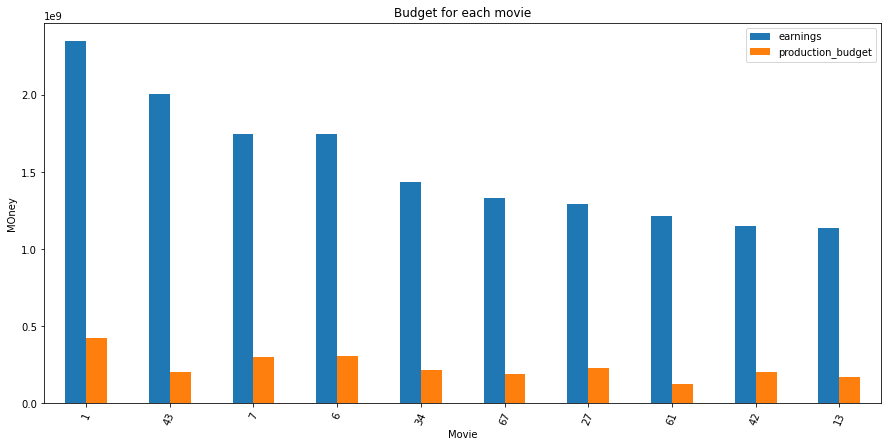

In [8]:
topten = tp1.loc[:,["movie", "earnings", "production_budget"]]
topten.plot.bar(figsize=(15,7))
plt.xticks(rotation=67)
plt.xlabel('Movie')
plt.ylabel('MOney')
plt.title('Budget for each movie')

#  📈 Statistical insights📈

For this analysis we use the `im.db` database, so let's start for load the data

In [9]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

Now, our first query is for the poblation, so we do not want null values, lets exclude them. In reference to:

![erd-im](https://github.com/PaolaMalagon/dsc-ai-academy-semester1-capstone/blob/main/movie_data_erd.jpeg?raw=true)

We could know what table join and what is the key

In [10]:
prueba= pd.read_sql("""
SELECT 
    mb.runtime_minutes, mr.numvotes, 
    mr.averagerating,  mb.original_title, mb.genres
  FROM 
      movie_basics mb
  JOIN 
      movie_ratings mr USING(movie_id) 
  WHERE 
      mb.runtime_minutes AND mb.genres IS NOT Null 
  ;
""", conn)
#prueba.info()

Ok, now we are sure we have no null values in the columns of our interest, also we can confirm by putting 
`prueba.info()` because it load as a dataframe, but maybe we have outlier, so in order to check that we can see the sactter between the `numvotes` and `runtime`

Text(0, 0.5, 'Number of votes')

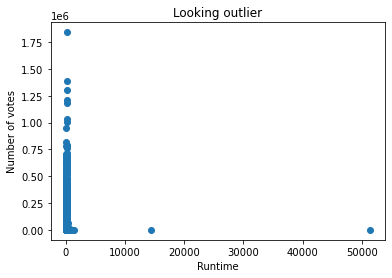

In [11]:
#In order to see the correlation we need the columns of runtime and votes as lists, so let's assing each to a new variables
prueba_run=list(prueba["runtime_minutes"])
prueba_numv=list(prueba["numvotes"])


fig, ax = plt.subplots()
#We use the method scatter
ax.scatter(prueba_run, prueba_numv)

#Setting labels and title
ax.set_title("Looking outlier")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

We can see there is outliers in our data in runtime as well as in Number of votes, according to `prueba.info()`we have 65720 rows, so we actually do not need this data, let's exclude them in our query, in the chart below we can have and idea of this limits.

## Poblation

In [12]:
poblation= pd.read_sql("""
SELECT 
    mb.runtime_minutes, mr.numvotes, 
    mr.averagerating,  mb.original_title, mb.genres
  FROM 
      movie_basics mb
  JOIN 
      movie_ratings mr USING(movie_id) 
  WHERE 
      mb.runtime_minutes AND mb.genres IS NOT Null
  AND 
      mr.numvotes < 948394
  AND 
      mb.runtime_minutes < 600
  ORDER 
      BY mr.numvotes DESC
  ;""", conn)

Let's confirm we do not have outliers anymore

Text(0, 0.5, 'Number of votes')

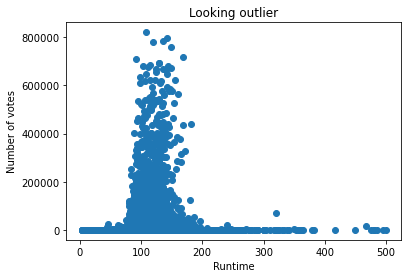

In [13]:
sc_p_run=list(poblation["runtime_minutes"])
sc_p_nv=list(poblation["numvotes"])


fig, ax = plt.subplots()
#We use the method scatter
ax.scatter(sc_p_run, sc_p_nv)

#Setting labels and title
ax.set_title("Looking outlier")
ax.set_xlabel("Runtime")
ax.set_ylabel("Number of votes")

Ok, this data is cotinuos now :D, let's set our sample:
## Sample
For this query we want to set the proposed interval of time 90-130 minutes

In [14]:
condition= pd.read_sql("""
SELECT 
    mb.runtime_minutes, 
    mr.numvotes, mr.averagerating
FROM
    movie_basics mb
JOIN 
    movie_ratings mr USING(movie_id) 
WHERE 
    mb.runtime_minutes 
AND 
    mb.genres IS NOT Null 
AND 
    mb.runtime_minutes < 130 
AND
    mb.runtime_minutes > 90
AND 
    mr.numvotes < 948394
ORDER BY 
    mb.runtime_minutes DESC
  ;
""", conn)

But this is not our actual sample because in order to be a sample we need to choose random data from `condition`

In [15]:
sample1=condition.sample(650)

Ok, now let's set our hypothesis:
* **$H_a$** :	The mean of the number of votes when a movie has a runtime 	between 90 and 130 is significantly bigger than the mean of all the 	movies in our dataset.
* **$H_0$** :	There is no significantly difference between the sample mean and 	the poblation mean.
* **$\alpha$** = 0.05.

## Z-score
We can know the mean and standard desviation of our poblation and sample, let's get them

In [23]:
#In advance we can see the basics for our sample and poblation
poblation.describe(), sample1.describe()

(       runtime_minutes       numvotes  averagerating
 count     65702.000000   65702.000000   65702.000000
 mean         93.635064    3804.866427       6.320407
 std          23.713557   28903.896286       1.458682
 min           3.000000       5.000000       1.000000
 25%          81.000000      16.000000       5.500000
 50%          91.000000      62.000000       6.500000
 75%         104.000000     352.000000       7.300000
 max         500.000000  820847.000000      10.000000,
        runtime_minutes       numvotes  averagerating
 count       650.000000     650.000000     650.000000
 mean        104.175385    6592.390769       6.213231
 std          10.327160   35505.695933       1.313698
 min          91.000000       5.000000       1.000000
 25%          95.000000      30.000000       5.500000
 50%         101.000000     168.500000       6.300000
 75%         111.000000     675.000000       7.100000
 max         129.000000  497363.000000       9.300000)

In [25]:
#For the pupulation
p_mean=poblation["numvotes"].mean()
p_std=poblation["numvotes"].std()

#For the sample
s_mean=sample1["numvotes"].mean()
s_std=sample1["numvotes"].std()

#Z equation
z = (s_mean - p_mean)/(p_std/np.sqrt(650))

#P-value:
#Positive z
p_value=1 - stats.norm.cdf(z)

#Negative z
#p_value=1 - stats.norm.cdf(z)

print("Z is equal to: " + str(z) + "\n And p-value: " +str(p_value) )

Z is equal to: 2.458775950829332
 And p-value: 0.006970579524776754


With this **P-value** we was able to reject the Null Hypothesis and we can conclude if the movie has a runtime between 90 and 130 minutes will get bigger number of votes.